In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sys

sys.path.append(os.path.abspath("../../"))
from dataset import DS_NAMES
from dataset import DS_DIMENSIONS
from utilities.figure_tools import get_latest_results_directory, make_fig_directory, load_results

cmap = plt.get_cmap("Set1")
colors = cmap.colors

In [95]:
run_id, run_path = get_latest_results_directory("../../results/bb-ordering/")

manual_select = False
if manual_select:
    run_id = 26
    run_path = "C:/Users/Peter/Documents/Peter/9-Graduate-School/2-dsrg/explainable-ad/code/HEEAD/results/bb-ordering/run-{:003d}".format(run_id)

print("Generating figures for run-{:03d}".format(run_id))
fig_output_path = make_fig_directory(run_id)

file_names = os.listdir(run_path)
orderings = ["PriorityQueue", "Stack", "Queue", "ModifiedPriorityQueue"]
for i in range(len(orderings)):
    orderings[i] = orderings[i].lower()

orders_pretty = {
    "priorityqueue": "PriorityQueue",
    "stack": "Stack",
    "queue": "Queue",
    "modifiedpriorityqueue": "ModifiedPriorityQueue"
}

found_orders = set()
found_ds = set()
found_files = []
for name in file_names:
        x = re.match("(.*)_dists_(.*)[.]csv", name)
        if x is not None:
            match_ds = x.group(1)
            match_order = x.group(2)
            if match_ds in DS_NAMES and match_order in orderings:
                found_ds.add(match_ds)
                found_orders.add(match_order)
                found_files.append((name, match_ds, match_order))
found_orders = list(found_orders)
found_ds = list(found_ds)
print("orders:", found_orders)
print("datasets:", found_ds)

Generating figures for run-029
orders: ['stack', 'priorityqueue', 'modifiedpriorityqueue']
datasets: ['spambase', 'vertebral', 'glass', 'magic', 'cancer']


In [96]:
def load_data(dataset, order):
    # cancer_dists_modifiedpriorityqueue.csv
    best_dists = pd.read_csv(run_path + "/" + ds + "_dists_" + order + ".csv")
    xs = []
    ys = []
    for idx, row in best_dists.iterrows():
        times = []
        dists = []
        sample_bests = row.dropna()[1:]
        for item in sample_bests:
            t, d = item[1:-1].replace(" ", "").split(",")
            times.append(int(t))
            dists.append(float(d))
        xs.append(np.array(times))
        ys.append(np.array(dists))
    
    return xs, ys

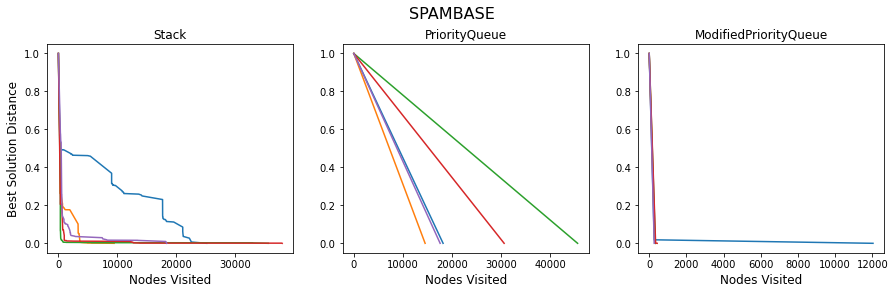

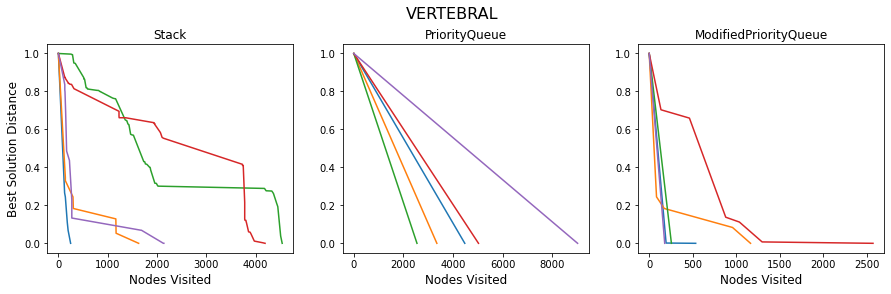

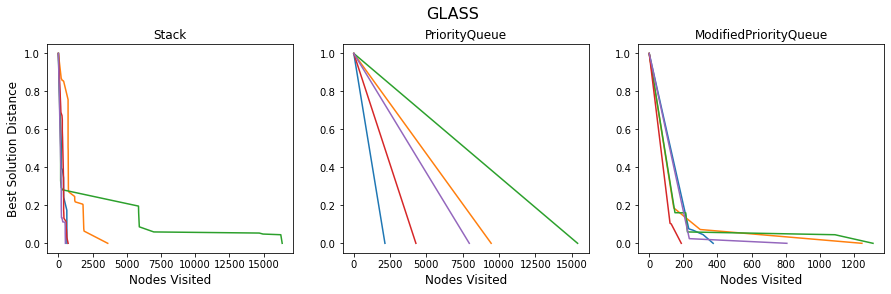

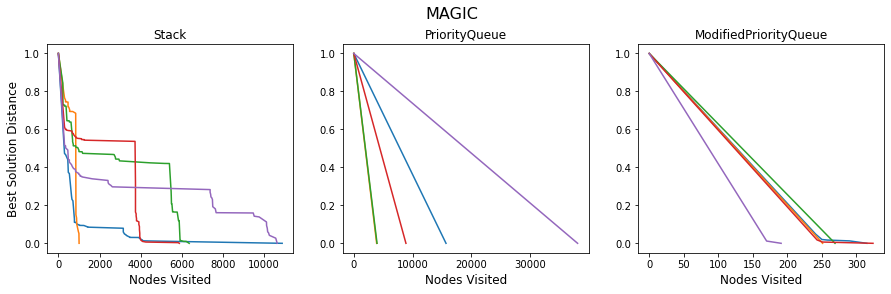

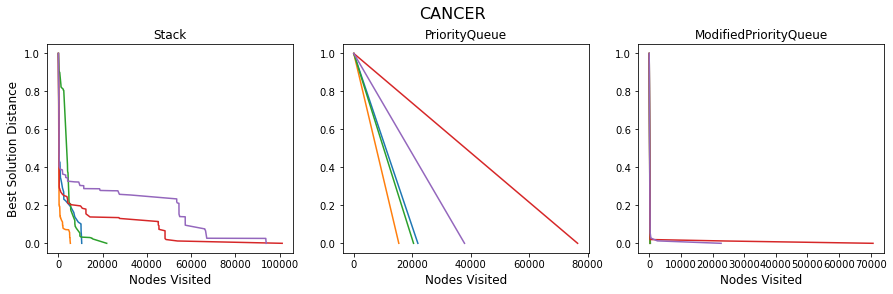

In [101]:
for ds in found_ds:
    fig = plt.figure(figsize=(len(found_orders)*5, 4))
    for i in range(1, len(found_orders)+1):
        xs, ys = load_data(ds, found_orders[i-1])
        ax = fig.add_subplot(1, len(found_orders), i)
        ax.set_title(orders_pretty[found_orders[i-1]], fontsize=12)
        ax.set_xlabel("Nodes Visited", fontsize=12)
        if i == 1:
            ax.set_ylabel("Best Solution Distance", fontsize=12)
        for x, y in zip(xs, ys):
            plt.plot(x, (y - np.min(y)) / (np.max(y) - np.min(y)))
    fig.suptitle(ds.upper(), fontsize=16)
    fig.subplots_adjust(top=.85)
    plt.savefig(fig_output_path +"/" + "dists_" + ds + ".png", bbox_inches="tight")